In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load cleaned data
df = pd.read_csv("../data/processed/cleaned_sales.csv")

print("Data loaded for forecasting ✅")
df.head()


Data loaded for forecasting ✅


,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue,year,month,month_name,quarter,weekday
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52,2022,4,April,2,Wednesday
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40,2023,3,March,1,Sunday
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28,2022,9,September,3,Wednesday
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64,2022,4,April,2,Sunday
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72,2022,3,March,1,Sunday


In [2]:
df['order_date'] = pd.to_datetime(df['order_date'])

monthly_revenue = (
    df.groupby(pd.Grouper(key='order_date', freq='M'))['total_revenue']
    .sum()
    .reset_index()
)

monthly_revenue.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_41532\2358854892.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key='order_date', freq='M'))['total_revenue']


,order_date,total_revenue
0,2022-01-31,1419751.89
1,2022-02-28,1266714.29
2,2022-03-31,1392585.42
3,2022-04-30,1371955.83
4,2022-05-31,1374779.57


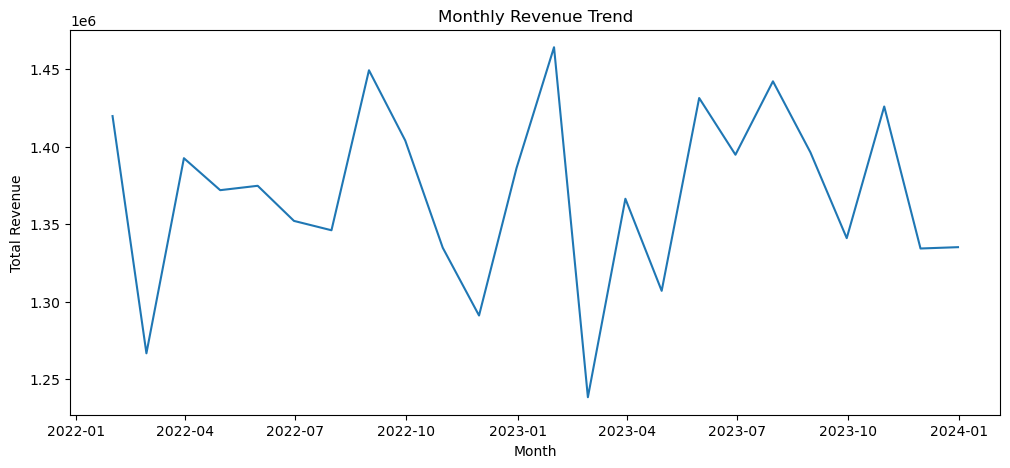

In [3]:
plt.figure(figsize=(12,5))
plt.plot(monthly_revenue['order_date'], monthly_revenue['total_revenue'])
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()


In [4]:
monthly_revenue['time_index'] = np.arange(len(monthly_revenue))
monthly_revenue.head()


,order_date,total_revenue,time_index
0,2022-01-31,1419751.89,0
1,2022-02-28,1266714.29,1
2,2022-03-31,1392585.42,2
3,2022-04-30,1371955.83,3
4,2022-05-31,1374779.57,4


In [5]:
X = monthly_revenue[['time_index']]
y = monthly_revenue['total_revenue']

split_index = int(len(monthly_revenue) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained ✅")


Linear Regression model trained ✅


In [7]:
monthly_revenue['predicted_revenue'] = model.predict(X)
monthly_revenue.tail()


,order_date,total_revenue,time_index,predicted_revenue
19,2023-08-31,1396321.88,19,1.382957e+06
20,2023-09-30,1341007.86,20,1.384233e+06
21,2023-10-31,1425936.23,21,1.385508e+06
22,2023-11-30,1334328.47,22,1.386784e+06
23,2023-12-31,1335185.33,23,1.388060e+06


In [8]:
mae = mean_absolute_error(y_test, model.predict(X_test))
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

mae, rmse


(40469.52581052622, np.float64(42962.090687921875))

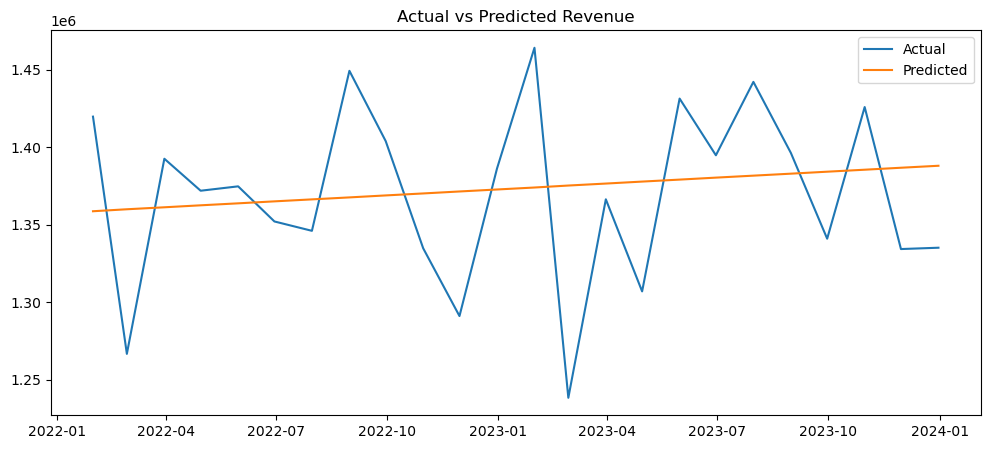

In [9]:
plt.figure(figsize=(12,5))
plt.plot(monthly_revenue['order_date'], monthly_revenue['total_revenue'], label='Actual')
plt.plot(monthly_revenue['order_date'], monthly_revenue['predicted_revenue'], label='Predicted')
plt.title("Actual vs Predicted Revenue")
plt.legend()
plt.show()


### 📈 Insight: Sales Forecasting
The forecasting model captures the overall revenue trend and provides a reasonable estimate 
of future sales. While simple linear regression is effective for trend-based forecasting, 
more advanced models could further improve accuracy by capturing seasonality and non-linear patterns.

